In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import gc

In [2]:
MSE_list_LAB = []
MSE_list_RGB = []
with tqdm(total=7129) as pbar:
    for i in range(7129):
        color = cv2.imread('E:/TER/landscape Images/color/'+str(i)+'.jpg')
        gray = cv2.imread('E:/TER/landscape Images/gray/'+str(i)+'.jpg')
        rgb = cv2.imread('E:/TER/Result_pix2pix_landscape_RGB/output/'+str(i)+'.png')
        lab = cv2.imread('E:/TER/Result_pix2pix_landscape_LAB/output/'+str(i)+'.png')
        color = cv2.resize(color, (256, 256))
        gray = cv2.resize(gray, (256, 256))
        color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
        rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
        lab = cv2.cvtColor(lab, cv2.COLOR_BGR2RGB)
        with tf.device('/cpu:0'):
            M = tf.keras.losses.MeanSquaredError()
            MSE_RGB = M(color.astype('int'), rgb.astype('int')).numpy()
            MSE_LAB = M(color.astype('int'), lab.astype('int')).numpy()
        MSE_list_LAB.append(MSE_LAB)
        MSE_list_RGB.append(MSE_RGB)
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 4, 3)
        plt.imshow(color)
        plt.title('Original')
        plt.subplot(1, 4, 1)
        plt.imshow(gray)
        plt.title('Gray')
        plt.subplot(1, 4, 2)
        plt.imshow(rgb)
        plt.title('RGB')
        plt.subplot(1, 4, 4)
        plt.imshow(lab)
        plt.title('LAB')
        plt.suptitle('MSE RGB: '+str(MSE_RGB)+' MSE LAB: '+str(MSE_LAB), fontsize=20)
        plt.savefig('E:/TER/Result_pix2pix_landscape/'+str(i)+'.png')
        plt.close()
        pbar.update(1)

100%|██████████| 7129/7129 [41:12<00:00,  2.88it/s]  


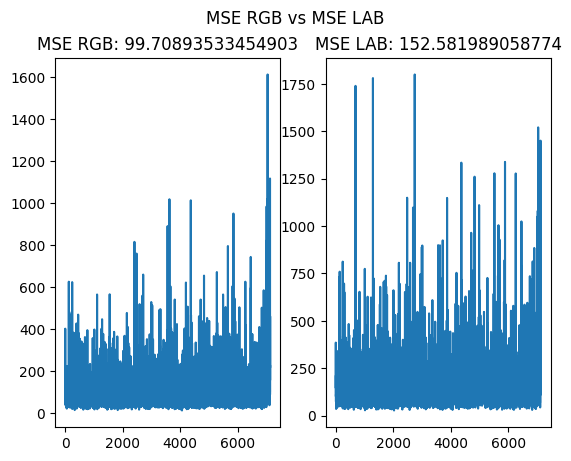

6610

In [5]:
plt.subplot(1, 2, 1)
plt.plot(MSE_list_RGB)
plt.title('MSE RGB: '+str(np.mean(MSE_list_RGB)))
plt.subplot(1, 2, 2)
plt.plot(MSE_list_LAB)
plt.title('MSE LAB: '+str(np.mean(MSE_list_LAB)))
plt.suptitle('MSE RGB vs MSE LAB')
plt.savefig('E:/TER/Result_pix2pix_landscape/MSE.png')
plt.show()
plt.close()
gc.collect()